<a href="https://colab.research.google.com/github/Ameesha2214/Unified_Mentor_Climate_/blob/main/Climate_Change_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset # Update with your file path
climate_data = pd.read_csv('climate_nasa.csv')

# Display dataset info
print(climate_data.info())
print(climate_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None
                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e

In [3]:
# Check for missing values
print("Missing Values:\n", climate_data.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary Statistics:\n", climate_data.describe())


Missing Values:
 date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

Summary Statistics:
        likesCount  commentsCount
count  522.000000     244.000000
mean     4.720307       8.696721
std     12.053556      12.266176
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       5.000000
75%      4.000000      10.000000
max    126.000000      93.000000


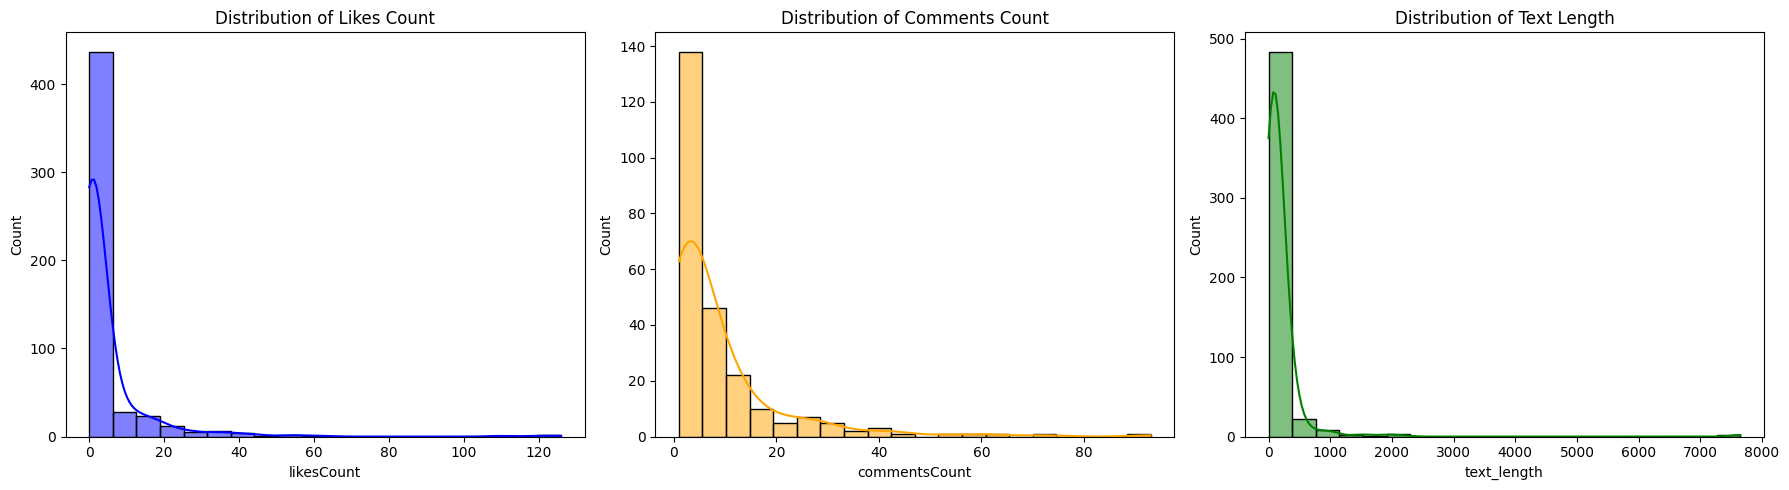

In [4]:
# Add a column for text length
climate_data['text_length'] = climate_data['text'].fillna("").apply(len)

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(climate_data['likesCount'], bins=20, ax=axes[0], kde=True, color='blue')
axes[0].set_title("Distribution of Likes Count")
sns.histplot(climate_data['commentsCount'], bins=20, ax=axes[1], kde=True, color='orange')
axes[1].set_title("Distribution of Comments Count")
sns.histplot(climate_data['text_length'], bins=20, ax=axes[2], kde=True, color='green')
axes[2].set_title("Distribution of Text Length")
plt.tight_layout()
plt.show()


In [5]:
# Fill missing values for `commentsCount` with the median
climate_data['commentsCount'] = climate_data['commentsCount'].fillna(climate_data['commentsCount'].median())

# Drop rows with missing text
climate_data = climate_data.dropna(subset=['text'])  # Or fill with placeholder:
# climate_data['text'] = climate_data['text'].fillna("No comment")


In [6]:
# Convert `date` to datetime
climate_data['date'] = pd.to_datetime(climate_data['date'])

# Extract year, month, and day
climate_data['year'] = climate_data['date'].dt.year
climate_data['month'] = climate_data['date'].dt.month
climate_data['day'] = climate_data['date'].dt.day

# Display the updated dataset
print(climate_data.head())


                       date  likesCount  \
0 2022-09-07 17:12:32+00:00           2   
1 2022-09-08 14:51:13+00:00           0   
2 2022-09-07 17:19:41+00:00           1   
3 2022-09-08 00:51:30+00:00           4   
4 2022-09-07 19:06:20+00:00          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            5.0   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            5.0   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            5.0   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  text_length  year  \
0  Neat comparison I have not heard it before.\n ...          173  2022   
1  An excellent way to visualise the invisible! T...           51  2022   
2  Does the CO2/ghg in the troposphere affect the...          108  2022   
3  excellent p

<ipython-input-7-d203ea7df25c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=climate_data, palette='viridis')


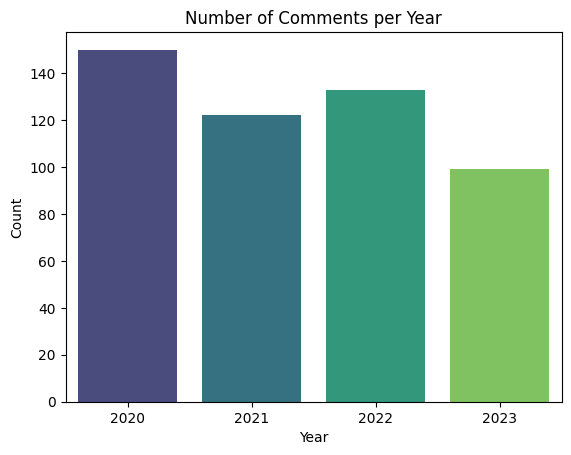

<ipython-input-7-d203ea7df25c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=climate_data, palette='viridis')


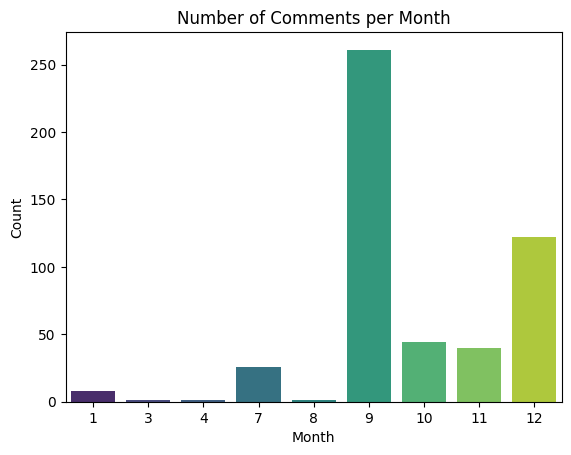

In [7]:
# Plot the number of comments per year
sns.countplot(x='year', data=climate_data, palette='viridis')
plt.title("Number of Comments per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Plot the number of comments per month (aggregated across years)
sns.countplot(x='month', data=climate_data, palette='viridis')
plt.title("Number of Comments per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download the necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab data package

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(words)

# Apply cleaning function
climate_data['cleaned_text'] = climate_data['text'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
climate_data['sentiment'] = climate_data['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
climate_data['sentiment_category'] = climate_data['sentiment'].apply(
    lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral'
)

# Check distribution of sentiment categories
print(climate_data['sentiment_category'].value_counts())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


sentiment_category
positive    198
neutral     186
negative    120
Name: count, dtype: int64


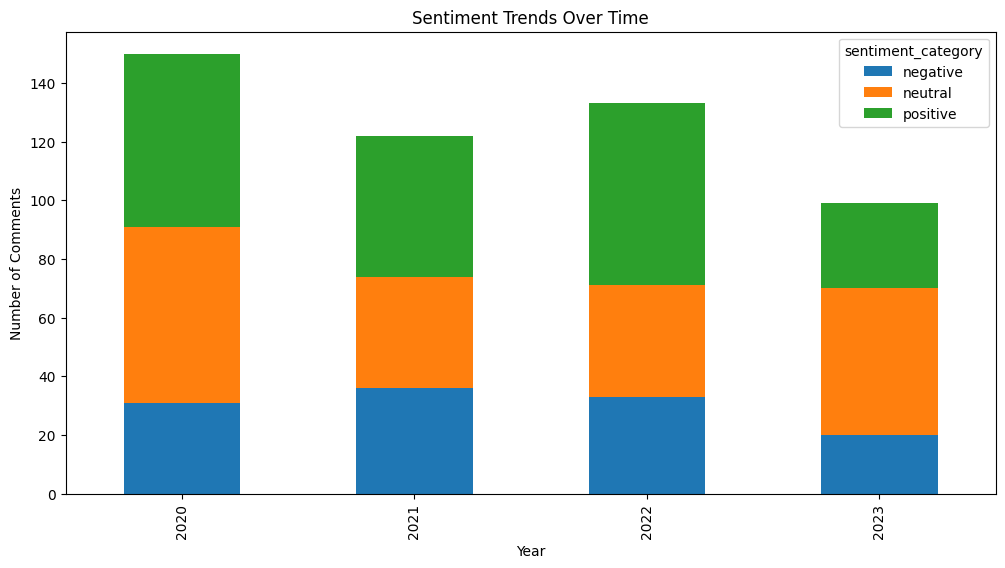

In [11]:
# Group by year and sentiment
sentiment_trends = climate_data.groupby(['year', 'sentiment_category']).size().unstack(fill_value=0)

# Plot sentiment trends over time
sentiment_trends.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Sentiment Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Comments")
plt.show()


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(climate_data['cleaned_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:
['think', 'year', 'planet', 'data', 'earth', 'dont', 'warming', 'global', 'change', 'climate']
Topic 2:
['heat', 'global', 'time', 'change', 'graph', 'sun', 'know', 'earth', 'year', 'temperature']
Topic 3:
['earth', 'sea', 'foot', 'water', 'dioxide', 'level', 'atmosphere', 'year', 'carbon', 'co2']
Topic 4:
['think', 'denier', 'make', 'going', 'good', 'scientist', 'nasa', 'change', 'people', 'climate']
Topic 5:
['stop', 'happened', 'que', 'world', 'year', 'ano', 'human', 'warming', 'global', 'planet']


In [13]:
pip install nltk pandas


In [14]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(words)


In [16]:
# Drop rows with missing text
climate_data = climate_data.dropna(subset=['text'])

# Apply text preprocessing
climate_data['cleaned_text'] = climate_data['text'].apply(clean_text)

# Display a few examples
print(climate_data[['text', 'cleaned_text']].head())


                                                text  \
0  Neat comparison I have not heard it before.\n ...   
1  An excellent way to visualise the invisible! T...   
2  Does the CO2/ghg in the troposphere affect the...   
3  excellent post! I defo feel the difference - o...   
4  Yes, and carbon dioxide does not harm the Eart...   

                                        cleaned_text  
0  neat comparison heard would say co like disco ...  
1           excellent way visualise invisible thanks  
2  coghg troposphere affect stratosphere warmer t...  
3  excellent post defo feel difference one drink ...  
4  yes carbon dioxide harm earth like people maki...  


In [17]:
# Save to a new CSV file for future use
climate_data.to_csv('cleaned_climate_data.csv', index=False)


In [18]:
pip install nltk


In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [20]:
# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to classify sentiment
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']  # Compound score
    if sentiment_score > 0.05:
        return 'positive'
    elif sentiment_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the cleaned text
climate_data['sentiment'] = climate_data['cleaned_text'].apply(get_sentiment)

# Display sentiment distribution
print(climate_data['sentiment'].value_counts())


sentiment
positive    198
neutral     186
negative    120
Name: count, dtype: int64


<ipython-input-21-3c559f65ce30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=climate_data, palette='viridis')


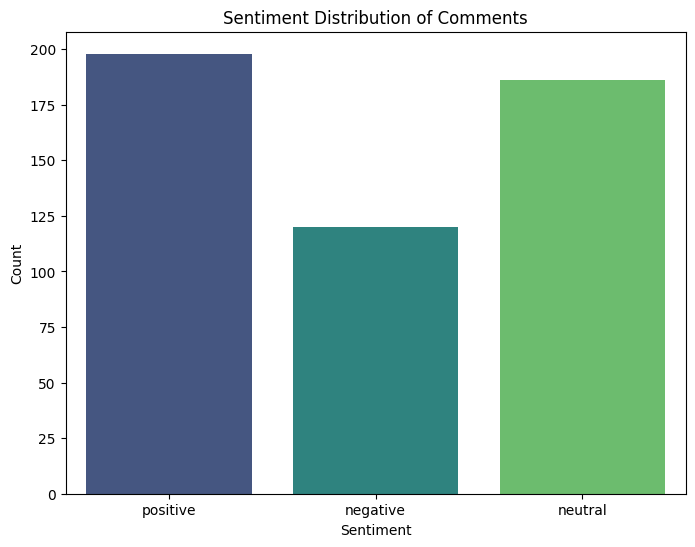

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=climate_data, palette='viridis')
plt.title("Sentiment Distribution of Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


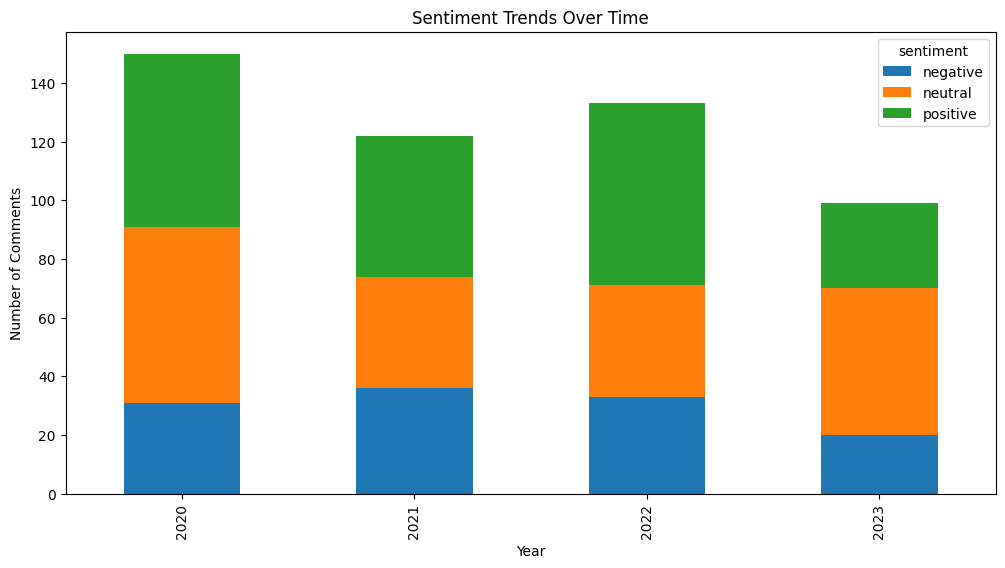

In [22]:
# Group by year and sentiment
sentiment_trends = climate_data.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plot sentiment trends over time
sentiment_trends.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Sentiment Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Comments")
plt.show()


In [23]:
# Convert the 'date' column to datetime
climate_data['date'] = pd.to_datetime(climate_data['date'], errors='coerce')

# Extract the year from the date
climate_data['year'] = climate_data['date'].dt.year

# Alternatively, extract the month if you want finer-grained analysis
# climate_data['month'] = climate_data['date'].dt.month


<Figure size 1200x600 with 0 Axes>

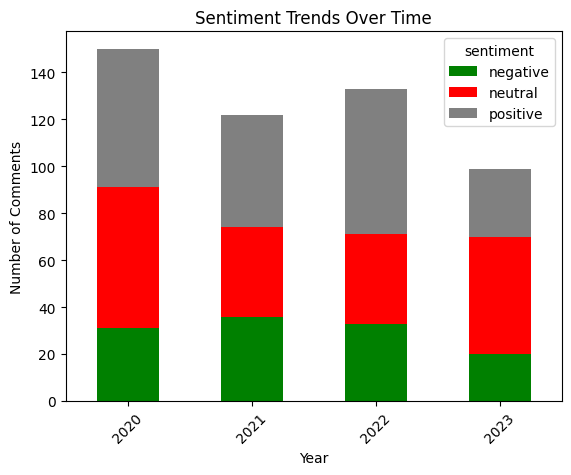

In [24]:
# Group by year and sentiment
sentiment_trends = climate_data.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
sentiment_trends.plot(kind='bar', stacked=True, color=['green', 'red', 'gray'])
plt.title("Sentiment Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.show()


<ipython-input-25-8743fc928113>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='likesCount', data=climate_data, palette='viridis')


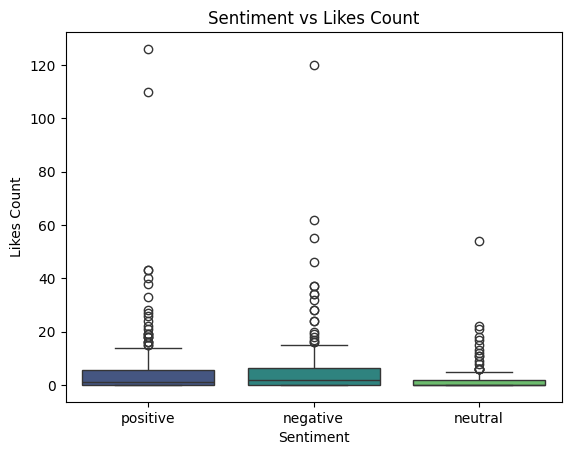

<ipython-input-25-8743fc928113>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='commentsCount', data=climate_data, palette='viridis')


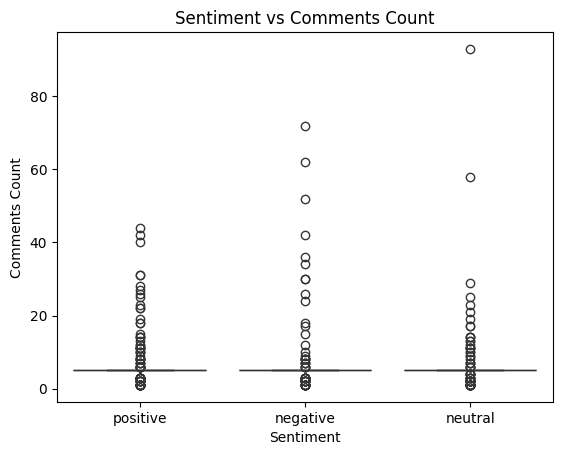

In [25]:
# Create a scatter plot of likes vs. sentiment
sns.boxplot(x='sentiment', y='likesCount', data=climate_data, palette='viridis')
plt.title("Sentiment vs Likes Count")
plt.xlabel("Sentiment")
plt.ylabel("Likes Count")
plt.show()

# Create a scatter plot of comments vs. sentiment
sns.boxplot(x='sentiment', y='commentsCount', data=climate_data, palette='viridis')
plt.title("Sentiment vs Comments Count")
plt.xlabel("Sentiment")
plt.ylabel("Comments Count")
plt.show()


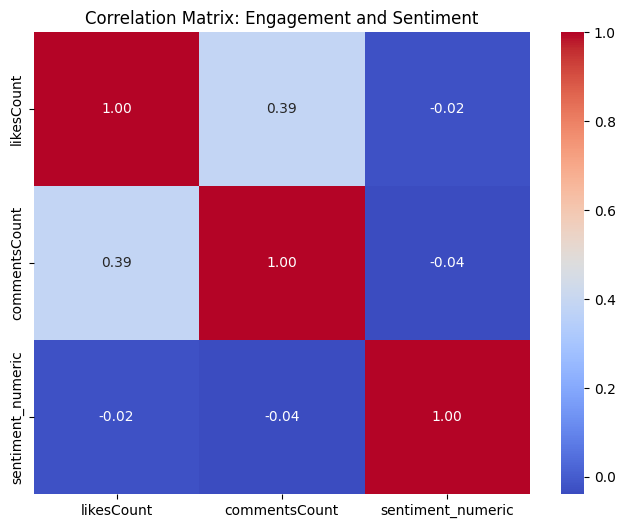

In [26]:
# Convert sentiment to numerical for correlation analysis
climate_data['sentiment_numeric'] = climate_data['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Calculate correlation matrix
correlation_matrix = climate_data[['likesCount', 'commentsCount', 'sentiment_numeric']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Engagement and Sentiment")
plt.show()


In [27]:
# Save the data with sentiment information to a new CSV file
climate_data.to_csv('sentiment_trends_engagement.csv', index=False)


In [28]:
pip install gensim pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.1 MB/s eta 0:00:00


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(climate_data['cleaned_text'])

# Check the shape of the TF-IDF matrix
print(X_tfidf.shape)


(504, 2688)


In [30]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model with 5 topics (you can experiment with the number of topics)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

# Get the topics and their most common words
n_words = 10
for index, topic in enumerate(lda.components_):
    print(f"Topic {index + 1}:")
    words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
    print(" ".join(words))
    print()


Topic 1:
hemisphere data warming graph global year science dont change climate

Topic 2:
planet people temperature nasa change time excellent year climate earth

Topic 3:
better love sun planet global temperature think year need people

Topic 4:
think ice warming change hot post like climate global year

Topic 5:
wow real denier nasa thing start data going climate change



In [31]:
import pyLDAvis
import pyLDAvis.sklearn

# Visualize topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, X_tfidf, vectorizer)
pyLDAvis.display(vis)


ModuleNotFoundError: No module named 'pyLDAvis.sklearn'

In [32]:
import pyLDAvis
import pyLDAvis.lda_model

# Visualize topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda, X_tfidf, vectorizer) # Use pyLDAvis.lda_model instead of pyLDAvis.sklearn
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
pip install gensim pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit to 5000 features for efficiency
X_tfidf = vectorizer.fit_transform(climate_data['cleaned_text'])

# Check the shape of the TF-IDF matrix
print(X_tfidf.shape)  # This will show how many terms are there across all the documents


(504, 2688)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model with 5 topics (you can change this value)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

# Display the top words for each topic
n_words = 10  # Number of words to display per topic
for index, topic in enumerate(lda.components_):
    print(f"Topic {index + 1}:")
    words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
    print(" ".join(words))
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1:
hemisphere data warming graph global year science dont change climate

Topic 2:
planet people temperature nasa change time excellent year climate earth

Topic 3:
better love sun planet global temperature think year need people

Topic 4:
think ice warming change hot post like climate global year

Topic 5:
wow real denier nasa thing start data going climate change



In [37]:
# Replace
# import pyLDAvis.sklearn
# with
import pyLDAvis.lda_model


# Replace
# vis = pyLDAvis.sklearn.prepare(lda, X_tfidf, vectorizer)
# with
vis = pyLDAvis.lda_model.prepare(lda, X_tfidf, vectorizer) # Use pyLDAvis.lda_model instead of pyLDAvis.sklearn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Vectorize the cleaned text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit to 5000 features
X_tfidf = vectorizer.fit_transform(climate_data['cleaned_text'])

# Check the shape of the TF-IDF matrix
print(X_tfidf.shape)  # This shows how many terms are represented across all documents


(504, 2688)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Initialize LDA model with 5 topics (you can experiment with this number)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

# Display the top words for each topic
n_words = 10  # Number of words to display per topic
for index, topic in enumerate(lda.components_):
    print(f"Topic {index + 1}:")
    words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
    print(" ".join(words))
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1:
hemisphere data warming graph global year science dont change climate

Topic 2:
planet people temperature nasa change time excellent year climate earth

Topic 3:
better love sun planet global temperature think year need people

Topic 4:
think ice warming change hot post like climate global year

Topic 5:
wow real denier nasa thing start data going climate change



In [41]:
import pyLDAvis
import pyLDAvis.lda_model # Import lda_model instead of sklearn

# Visualize topics
pyLDAvis.enable_notebook()  # Use this for Jupyter notebooks
vis = pyLDAvis.lda_model.prepare(lda, X_tfidf, vectorizer) # Use pyLDAvis.lda_model instead of pyLDAvis.sklearn
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Save the topics' words for later reference
topics = []
for index, topic in enumerate(lda.components_):
    words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]]
    topics.append(f"Topic {index + 1}: " + " ".join(words))

# Save the results to a CSV file
topics_df = pd.DataFrame(topics, columns=["Topics"])
topics_df.to_csv('lda_topics.csv', index=False)

print(topics_df)


                                              Topics
0  Topic 1: hemisphere data warming graph global ...
1  Topic 2: planet people temperature nasa change...
2  Topic 3: better love sun planet global tempera...
3  Topic 4: think ice warming change hot post lik...
4  Topic 5: wow real denier nasa thing start data...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
import numpy as np

# Simulate CO2 levels (assuming a gradual increase over years)
years = [2020, 2021, 2022, 2023]
co2_levels = [400, 410, 420, 430]  # Example CO2 levels in parts per million (ppm)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# Simulate sentiment change based on CO2 levels (this is a simple assumption)
sentiment_trends = [0.2, 0.15, 0.1, -0.1]  # Hypothetical sentiment trend values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


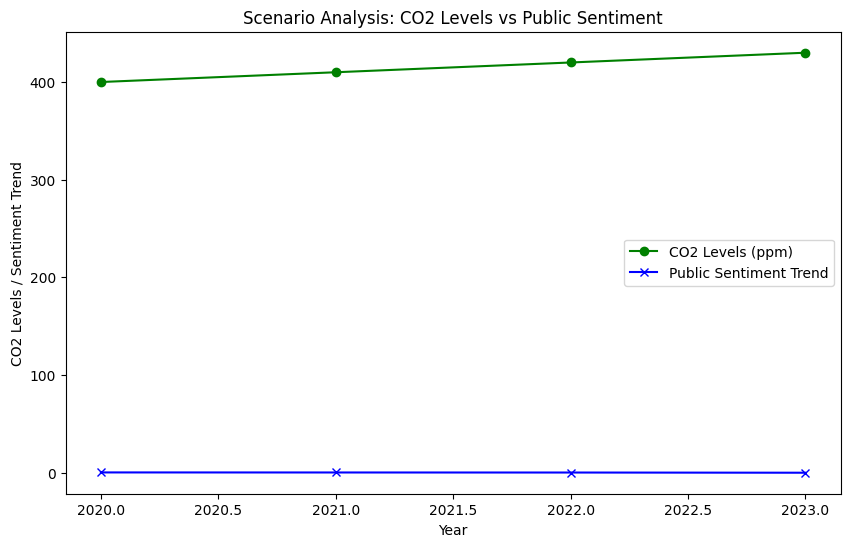

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(years, co2_levels, label="CO2 Levels (ppm)", color='green', marker='o')
plt.plot(years, sentiment_trends, label="Public Sentiment Trend", color='blue', marker='x')
plt.title("Scenario Analysis: CO2 Levels vs Public Sentiment")
plt.xlabel("Year")
plt.ylabel("CO2 Levels / Sentiment Trend")
plt.legend()
plt.show()


In [46]:
import pandas as pd

# Example climate data (replace with real data)
climate_data = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023],
    'CO2_Level': [400, 410, 420, 430],  # CO2 levels in ppm
    'Temperature_Anomaly': [0.5, 0.6, 0.7, 0.8]  # Temperature anomalies in Celsius
})

# Sentiment data from your earlier dataset (make sure it's processed)
# Example sentiment data (replace with your actual data)
sentiment_data = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023],
    'Sentiment': [0.2, 0.15, 0.1, -0.1]  # Example sentiment scores
})

# Merge climate and sentiment data on the 'Year' column
merged_data = pd.merge(climate_data, sentiment_data, on='Year')

# Display the merged data
print(merged_data)


   Year  CO2_Level  Temperature_Anomaly  Sentiment
0  2020        400                  0.5       0.20
1  2021        410                  0.6       0.15
2  2022        420                  0.7       0.10
3  2023        430                  0.8      -0.10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = merged_data[['CO2_Level', 'Temperature_Anomaly']]  # Independent variables
y = merged_data['Sentiment']  # Dependent variable (Sentiment)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Absolute Error: 0.014000000000000207
Mean Squared Error: 0.0001960000000000058
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [48]:
import plotly.express as px

# Create an interactive plot of CO2 levels vs Sentiment
fig = px.line(merged_data, x='Year', y=['CO2_Level', 'Sentiment'],
              title="CO2 Levels vs Public Sentiment",
              labels={'value': 'CO2 Level / Sentiment', 'variable': 'Legend'})

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



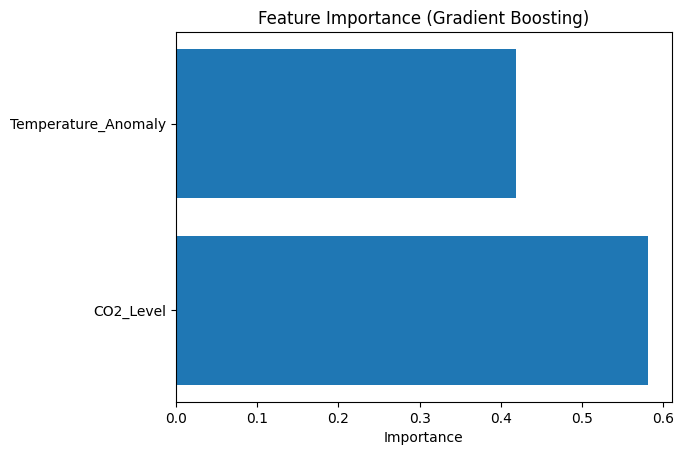

In [50]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor # Import GradientBoostingRegressor

# Assuming you want to use Gradient Boosting, initialize and train it
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42) # Initialize gbm_model
gbm_model.fit(X_train, y_train) # Train gbm_model using your training data

# Get feature importances from the trained model
feature_importances = gbm_model.feature_importances_

# Visualize feature importance
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



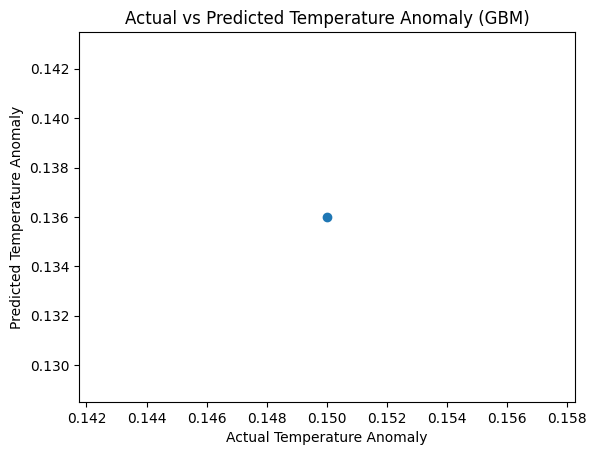

In [51]:
# Compare predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Temperature Anomaly')
plt.ylabel('Predicted Temperature Anomaly')
plt.title('Actual vs Predicted Temperature Anomaly (GBM)')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

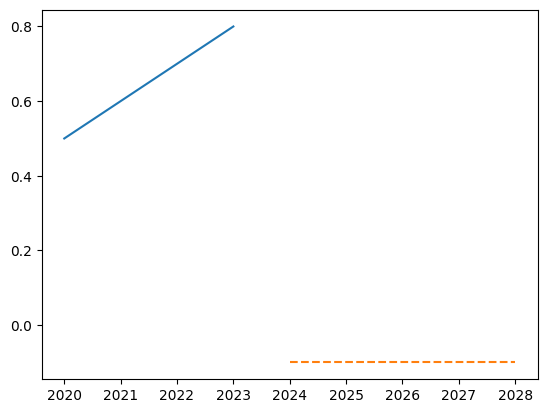

In [53]:
# Simulate future CO2 levels (assuming a constant increase for the next 5 years)
future_years = [2024, 2025, 2026, 2027, 2028]
future_co2_levels = [440, 450, 460, 470, 480]

# Assuming a linear increase in temperature anomaly based on previous data
# You'll likely want to replace this with a more sophisticated prediction
# based on climate models or trends.
temp_anomaly_increase_per_year = climate_data['Temperature_Anomaly'].diff().mean()
future_temp_anomalies = [
    climate_data['Temperature_Anomaly'].iloc[-1] + i * temp_anomaly_increase_per_year
    for i in range(1, 6)
]

# Predict future temperature anomalies based on the future CO2 levels
future_data = pd.DataFrame({'CO2_Level': future_co2_levels, 'Temperature_Anomaly': future_temp_anomalies})
future_predictions = gbm_model.predict(future_data[['CO2_Level', 'Temperature_Anomaly']]) # Include both features

# Plot the future projections
plt.plot(climate_data['Year'], climate_data['Temperature_Anomaly'], label='Actual Temperature Anomaly')
plt.plot(future_years, future_predictions, label='Predicted Temperature Anomaly', linestyle='--')
plt